In [1]:
%run lib.py

In [2]:
import ast
import networkx as nx

from graphviz import render

In [3]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('ggplot')

plt.rcParams['figure.figsize']

[6.4, 4.8]

In [4]:
%matplotlib inline

---

In [5]:
lifting_df = pd.read_excel('lifting_results.xlsx', index_col=[0,1])

In [6]:
lifting_df.head()

topics_and_memberships  \
cluster_id Unnamed: 1                                                       
0          0           ('5.2.4.1.2. -- Q-learning', 0.299)                  
           1           ('5.2.1.1.2. -- Learning to rank', 0.242)            
           2           ('3.4.4.5. -- Learning to rank', 0.242)              
           3           ('5.2.2.1. -- Batch learning', 0.235)                
           4           ('5.2.1.4.2. -- Lifelong machine learning', 0.231)   

                                           head_subjects  \
cluster_id Unnamed: 1                                      
0          0           1.1.1. -- Machine learning theory   
           1           5.2. -- Machine learning            
           2           NaN                                 
           3           NaN                                 
           4           NaN                                 

                                                                          gaps  \
cluster_id Unnamed: 1                                                            
0          0           1.1.1.1. -- Sample complexity and generalization bounds   
           1           1.1.1.12. -- Structured prediction                        
           2           1.1.1.13.1. -- Sequential decision making                 
           3           1.1.1.13.4. -- Multi-agent reinforcement learning         
           4           1.1.1.16. -- Markov decision processes                    

                                          offshoots  
cluster_id Unnamed: 1                                
0          0           3.4.4.5. -- Learning to rank  
           1           NaN                           
           2           NaN                           
           3           NaN                           
           4           NaN

In [7]:
topics_u = lifting_df['topics_and_memberships']\
    .dropna()\
    .apply(ast.literal_eval)\
    .to_frame()\
    .assign(
        topic=lambda x: x['topics_and_memberships'].apply(lambda y: y[0]),
        u=lambda x: x['topics_and_memberships'].apply(lambda y: y[1])
    )\
    [['topic', 'u']]\
.rename(columns={'topic': 'head_subjects'})\
.reset_index()


In [8]:
clusters = lifting_df.index.levels[0]

In [9]:
heads = lifting_df['head_subjects'].dropna()
offshoots = lifting_df['offshoots'].dropna()

heads_and_offs = pd.concat((heads, offshoots), axis=0)\
    .rename('head_subjects')\
    .to_frame()\
    .reset_index()\
    .pipe(lambda x: pd.merge(x,topics_u, on=['cluster_id', 'head_subjects'], how='left'))\
    .fillna(1)\
    .set_index(['cluster_id'])\
    .loc[:, ['head_subjects', 'u']]


cluster_connections = heads_and_offs\
    .reset_index()\
    .pipe(lambda x: pd.merge(x, x, on='head_subjects', how='outer'))\
    .loc[lambda x: (x['cluster_id_x'] != x['cluster_id_y'])]

node_labels = heads.reset_index()\
    .assign(head_subjects=lambda x: x['head_subjects'].str.replace('--|--', '—'))\
    .groupby('cluster_id')\
    ['head_subjects']\
    .apply(list)\
    .apply(lambda x: '\n'.join(x))


In [10]:
cluster_connections

,cluster_id_x,head_subjects,u_x,cluster_id_y,u_y
4,2,2.1.1. -- Probabilistic representations,1.000,5,1.000
5,5,2.1.1. -- Probabilistic representations,1.000,2,1.000
11,4,3.1.4. -- Query languages,1.000,12,1.000
12,4,3.1.4. -- Query languages,1.000,23,1.000
13,12,3.1.4. -- Query languages,1.000,4,1.000
15,12,3.1.4. -- Query languages,1.000,23,1.000
16,23,3.1.4. -- Query languages,1.000,4,1.000
17,23,3.1.4. -- Query languages,1.000,12,1.000
20,4,3.4. -- Information retrieval,1.000,8,1.000
21,8,3.4. -- Information retrieval,1.000,4,1.000


In [11]:
clusters_adjacency = np.zeros((len(clusters), len(clusters)))
for i, row in cluster_connections.iterrows():
    clusters_adjacency[row['cluster_id_x'], row['cluster_id_y']] = (row['u_x'] + row['u_y'])/2

In [12]:
clusters_adjacency

array([[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.15  , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.15  ,  0.    , ...,  0.    ,  0.171 ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.2025,  0.1575],
       [ 0.    ,  0.    ,  0.171 , ...,  0.2025,  0.    ,  0.1665],
       [ 0.    ,  0.    ,  0.    , ...,  0.1575,  0.1665,  0.    ]])

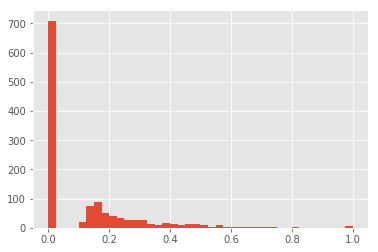

In [16]:
plt.hist(clusters_adjacency.ravel(), bins=40);

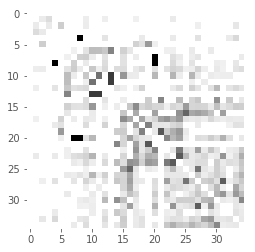

In [14]:
plt.imshow(clusters_adjacency, cmap='Greys')
plt.grid(0)

In [20]:
for x in np.arange(0.1, 0.35, 0.02):
    print(x, (clusters_adjacency > x).mean())

0.1 0.42122448979591837
0.12000000000000001 0.4146938775510204
0.14 0.3673469387755102
0.16000000000000003 0.3036734693877551
0.18000000000000002 0.2677551020408163
0.2 0.23183673469387756
0.22000000000000003 0.2057142857142857
0.24000000000000002 0.17959183673469387
0.26 0.16489795918367348
0.28 0.14204081632653062
0.30000000000000004 0.12571428571428572
0.32000000000000006 0.10938775510204081
0.3400000000000001 0.0963265306122449


0.34448979591836737

In [ ]:
for thresh in np.linspace(0., 0.3,10):
    clusters_adjacency_clipped = clusters_adjacency.copy()
    clusters_adjacency_clipped[clusters_adjacency < thresh] = 0
    g = nx.from_numpy_array(clusters_adjacency_clipped)

    nx.set_node_attributes(g, {n: {'label': f'Cluster {n}. Head subjects:\n' + label} for n, label in node_labels.iteritems()})

    no_head_subj_nodes = [i for i in g.nodes if 'label' not in g.node[i]]
    g.remove_nodes_from(no_head_subj_nodes)
#     g = nx.maximum_spanning_tree(g)
    
    fname = f'images/graph_{thresh:.2f}.dot'
    nx.nx_pydot.write_dot(g, open(fname, 'w', encoding='utf-8'))
    render(engine='dot', format='pdf', filepath=fname)

In [24]:
node_labels = node_labels.str.replace('4.+0 — Human-centered computing', '4.1 — Visualization')

In [30]:
thresh = 0.25
clusters_adjacency_clipped = clusters_adjacency.copy()
clusters_adjacency_clipped[clusters_adjacency < thresh] = 0
g = nx.from_numpy_array(clusters_adjacency_clipped)

nx.set_node_attributes(g, {n: {'label': f'Cluster {n}\n' + label} for n, label in node_labels.iteritems()})

no_head_subj_nodes = [i for i in g.nodes if 'label' not in g.node[i]]
g.remove_nodes_from(no_head_subj_nodes)

singletons = [i for i in g.nodes if g.degree[i] == 0]
g.remove_nodes_from(singletons)


fname = f'images/graph_{thresh:.2f}.dot'
nx.nx_pydot.write_dot(g, open(fname, 'w', encoding='utf-8'))
render(engine='neato', format='svg', filepath=fname)
render(engine='dot', format='pdf', filepath=fname)

'images/graph_0.25.dot.pdf'